<a href="https://colab.research.google.com/github/taraudani/trees-FORK/blob/main/assignment_(3).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment: Trees
Do three questions.

# **Q1.**
Please answer the following questions in your own words.

**1. How are trees constructed?**

Trees are a supervised learning algorithm for regression and classification that essentially split the data into groups to minimize differences in outcomes within the groups. There are a set of decision nodes that are the set decision points, a set of edges that represent choices at each decision node, and a set of terminal nodes or outcomes at the bottom of the decision tree.

**2. How do trees handle non-linear relationships between variables? Compare this to linear models.**

Decision trees naturally handle non-linearity, as they split the data based on parameters which carves the feature space. Alternatively, non-linear models assume a linear relationship between the input and output which means they struggle to interpret non-linearity.

**3. Why is the Gini a good loss function for categorical target variables?**

The Gini is a measure of the probability of misclassifying a randomly chosen sample from the node if you label it according to the distribution of classes for that node. This is good for categorical target variables because it directly aligns with the goal of classification trees - to group similar labels together. When the Gini is 0, all the samples belong to one class, and when it is higher, the classes are mixed which encourages splits for isolation of samples.

**4. Why do trees tend to overfit, and how can this tendency be constrained?**

Decision trees are prone to overfitting because they are very flexible and will keep splitting the data until each point is assigned a class. This means that they will memorize the training data perfectly but are less adept to generalization.  

**5. True or false, and explain: Trees only really perform well in situations with lots of categorical variables as features/covariates.**

This is false because decision trees can also work well under different conditions. For example, They can work under continuous variables where they set a numerical value as a threshold.

**6. Why don't most versions of classification/regression tree concept allow for more than two branches after a split?**

Two branches or less allows for less overfitting of the data and also more flexibility and efficency.

**7. What are some heuristic ways you can examine a tree and decide whether it is probably over- or under-fitting?**

The deeper the tree (the more levels), the more likely it is overfitting, and the shallower the tree (fewer levels), the more likely it is underfitting. Additionally, more leaves/nodes with fewer data points in each means the tree is overfitting and vise versa.


# **Q4.**
This is a case study about trees using bond rating data. This is a dataset about bond ratings for different companies, alongside a bunch of business statistics and other data. Companies often have multiple reviews at different dates. We want to predict the bond rating (AAA, AA, A, BBB, BB, B, ..., C, D). Do business fundamentals predict the company's rating?

1. Load the `./data/corporate_ratings.csv` dataset. How many observations and variables does it contain? Print out the first few rows of data.

2.  Plot a histogram of the `ratings` variable. It turns out that the gradations of AAA/AA/A and BBB/BB/B and so on make it hard to get good results with trees. Collapse all AAA/AA/A ratings into just A, and similarly for B and C.

3. Use all of the variables **except** Rating, Date, Name, Symbol, and Rating Agency Name. To include Sector, make a dummy/one-hot-encoded representation and include it in your features/covariates. Collect the relevant variables into a data matrix $X$.

4. Do a train/test split of the data and use a decision tree classifier to predict the bond rating. Including a min_samples_leaf constraint can raise the accuracy and speed up computation time. Print a confusion matrix and the accuracy of your model. How well do you predict the different bond ratings?

5. If you include the rating agency as a feature/covariate/predictor variable, do the results change? How do you interpret this?

In [2]:
from google.colab import files
_ = files.upload()

Saving corporate_ratings.csv to corporate_ratings (1).csv


In [7]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_csv('corporate_ratings.csv')
df.head()

,Rating,Name,Symbol,Rating Agency Name,Date,Sector,currentRatio,quickRatio,cashRatio,daysOfSalesOutstanding,...,effectiveTaxRate,freeCashFlowOperatingCashFlowRatio,freeCashFlowPerShare,cashPerShare,companyEquityMultiplier,ebitPerRevenue,enterpriseValueMultiple,operatingCashFlowPerShare,operatingCashFlowSalesRatio,payablesTurnover
0,A,Whirlpool Corporation,WHR,Egan-Jones Ratings Company,11/27/2015,Consumer Durables,0.945894,0.426395,0.099690,44.203245,...,0.202716,0.437551,6.810673,9.809403,4.008012,0.049351,7.057088,15.565438,0.058638,3.906655
1,BBB,Whirlpool Corporation,WHR,Egan-Jones Ratings Company,2/13/2014,Consumer Durables,1.033559,0.498234,0.203120,38.991156,...,0.074155,0.541997,8.625473,17.402270,3.156783,0.048857,6.460618,15.914250,0.067239,4.002846
2,BBB,Whirlpool Corporation,WHR,Fitch Ratings,3/6/2015,Consumer Durables,0.963703,0.451505,0.122099,50.841385,...,0.214529,0.513185,9.693487,13.103448,4.094575,0.044334,10.491970,18.888889,0.074426,3.483510
3,BBB,Whirlpool Corporation,WHR,Fitch Ratings,6/15/2012,Consumer Durables,1.019851,0.510402,0.176116,41.161738,...,1.816667,-0.147170,-1.015625,14.440104,3.630950,-0.012858,4.080741,6.901042,0.028394,4.581150
4,BBB,Whirlpool Corporation,WHR,Standard & Poor's Ratings Services,10/24/2016,Consumer Durables,0.957844,0.495432,0.141608,47.761126,...,0.166966,0.451372,7.135348,14.257556,4.012780,0.053770,8.293505,15.808147,0.058065,3.857790


<Axes: xlabel='Rating', ylabel='Count'>

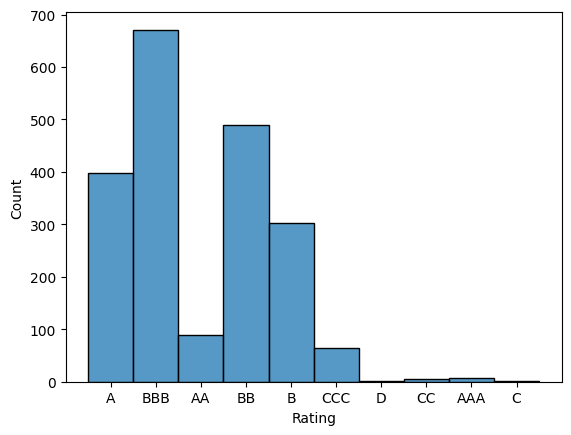

In [8]:
sns.histplot(df['Rating'])

<Axes: xlabel='Rating', ylabel='Count'>

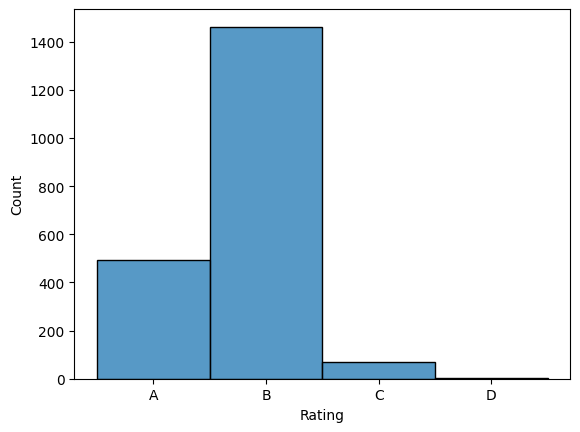

In [16]:
def ratings_comb(rating):
    if rating in ['AAA', 'AA', 'A']:
        return 'A'
    elif rating in ['BBB', 'BB', 'B']:
        return 'B'
    elif rating in ['CCC', 'CC', 'C']:
        return 'C'
    elif rating in ['DDD', 'DD', 'D']:
        return 'D'
    else:
        return rating

df['Rating'] = df['Rating'].apply(ratings_comb)

sns.histplot(df['Rating'])

In [17]:
excluded_cols = ['Rating', 'Date', 'Name', 'Symbol', 'Rating Agency Name']
df_reduced = df.drop(columns=excluded_cols)

df_encoded = pd.get_dummies(df_reduced, columns=['Sector'], drop_first=True)
X = df_encoded

X.head()

,currentRatio,quickRatio,cashRatio,daysOfSalesOutstanding,netProfitMargin,pretaxProfitMargin,grossProfitMargin,operatingProfitMargin,returnOnAssets,returnOnCapitalEmployed,...,Sector_Consumer Durables,Sector_Consumer Non-Durables,Sector_Consumer Services,Sector_Energy,Sector_Finance,Sector_Health Care,Sector_Miscellaneous,Sector_Public Utilities,Sector_Technology,Sector_Transportation
0,0.945894,0.426395,0.099690,44.203245,0.037480,0.049351,0.176631,0.061510,0.041189,0.091514,...,True,False,False,False,False,False,False,False,False,False
1,1.033559,0.498234,0.203120,38.991156,0.044062,0.048857,0.175715,0.066546,0.053204,0.104800,...,True,False,False,False,False,False,False,False,False,False
2,0.963703,0.451505,0.122099,50.841385,0.032709,0.044334,0.170843,0.059783,0.032497,0.075955,...,True,False,False,False,False,False,False,False,False,False
3,1.019851,0.510402,0.176116,41.161738,0.020894,-0.012858,0.138059,0.042430,0.025690,-0.027015,...,True,False,False,False,False,False,False,False,False,False
4,0.957844,0.495432,0.141608,47.761126,0.042861,0.053770,0.177720,0.065354,0.046363,0.096945,...,True,False,False,False,False,False,False,False,False,False


Accuracy: 0.712


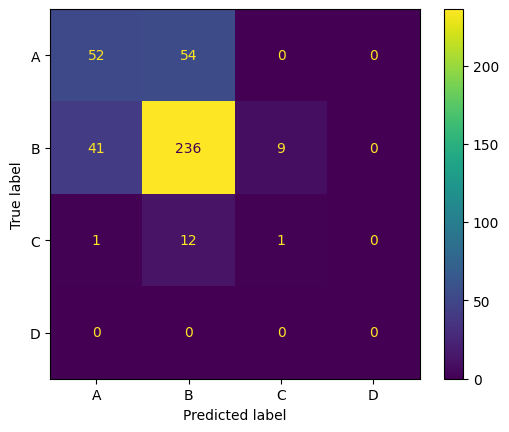

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

y = df['Rating']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=37)

clf = DecisionTreeClassifier(min_samples_leaf=5, random_state=37)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
acc = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred, labels=clf.classes_)

print(f"Accuracy: {acc:.3f}")

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
disp.plot()

# **Q6.**
Show that any decision tree is equivalent to a linear regression on a set of dummy variables that represent the optimal splits in the tree.

Hint: You can think of CART as partitioning the feature space into a set of sets $\{S_1, S_2, ..., S_K\}$, and then predicting the average for all of the observations in each set $S_k$, $m_k$:
$$
\hat{y}(x) = \sum_{k=1}^K \mathbb{I}\{ x \text{ is in } S_k \} m_k
$$
where $\mathbb{I} \{ P(x,k)\}$ takes the value 1 if the proposition $P(x,k)$ is true and 0 otherwise. Now, doesn't that look like least-squares regression on a set of dummy/one-hot-encoded variables?

Conversely, can any linear regression be represented by a tree?

The equation above for the decision tree is essentially linear regression on one-hot encoded region indicators. For example, if {𝑥 is in 𝑆𝑘} were to be replaced with zk where each zk is a column of design matrix Z, the equation would be equivalent to y^ = Z * m which is ordinary least squares (OLS) regression on dummy variables. This means that any decision tree can be rewritten as a linear regression model on a set of dummy variables.

However, linear regression generally allows you to fit arbitrary linear combinations of features, while decision trees create rectangular sections of a feature space, which means it is not a continuous linear function. A tree cannot replicate a linear regression model unless you use a huge number of splits to approximate the plane.